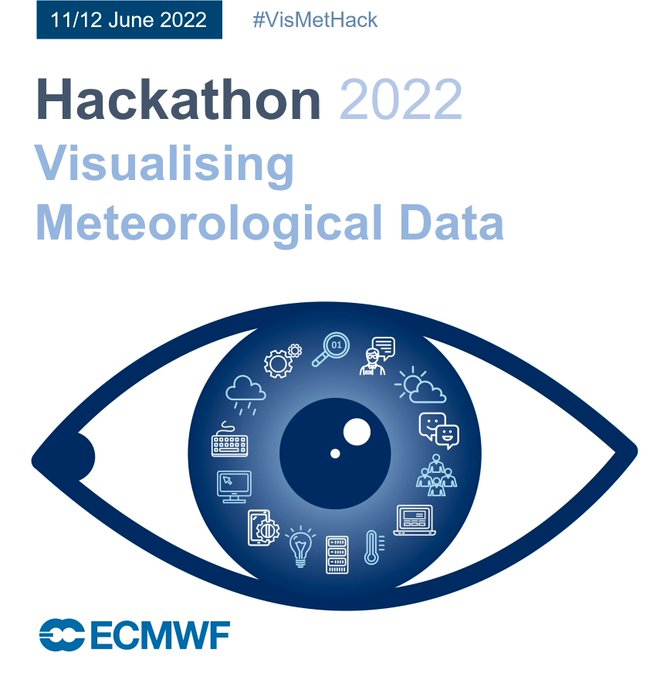

## Improve the visualisation of forecasts for the Madden-Julian oscillation

### Background and task

The Madden-Julian Oscillation (MJO hereafter) is a pulse of enhanced and suppressed convection that propagates eastward along the equator. A typical time-scale for the pulse to make one lap around the globe is 30-40 days. The MJO is therefore considered as a source of predictability for extended-range forecasts. For example, the risk of tropical cyclones is increased in a region during phases with enhanced convection.  

The MJO is usually characterised by its phase and amplitude; where the phase describes the location of the enhanced convection, and the amplitude indicates the strength of the MJO. 8 different phases of the MJO are defined. As many pulses start over the Indian Ocean, this section is defined as phase 1. The location of the enhanced and suppressed convection in each phase is shown in Figure 1. Forecasts of the MJO are typically visualised using a ‘phase diagram’ (Figure 2), produced by the projection of the outgoing long-wave radiation, and zonal wind at 850hPa and at 200hPa, on the two leading empirical orthogonal functions (EOFs) of these variables along the equator. The result is a time-series of the two projections, referred to as RMM1 and RMM2, which are visualised in the 2-dimensional phase diagram (Figure 2), where the angle gives the position (phase) of the pulse and the amplitude is the strength. If the projection is strongly positive on RMM1, the convection is enhanced over the Maritime continent, while if RMM2 is strongly positive the convection is enhanced over Western Pacific.

The ECMWF extended-range forecasts consist of 50 ensemble members with a lead time up to 46 days ahead. In 2023 the number of members will be increased to 100. For each member and lead time, RMM1 and RMM2 are determined.

The task is to improve the visualisation of the MJO forecast from the ensemble. One direction could be to visualise a 2-dimensional PDF of the RMMs for different lead times, but other directions could be explored.

As mentioned above, the MJO often triggers tropical cyclones. An additional task is therefore to collocate the MJO and the tropical cyclone activity (example of a current tropical cyclone activity forecast product is shown in Figure 3) in each ensemble member in a graphical product that allows users to visualise the tropical cyclone and MJO information together.

## Data

### MJO

The files ENS_MJO_fcst_20220523_emX.csv provide the MJO forecast information for each ensemble member (X). The first 150 rows contain analysis data for the 150 days before the start of the forecast, followed by a 31-day forecast, starting on 23rd May 2022. Dates (YYYYMMDD) are provided in the first column. Variables (columns) include RMM1, RMM2, Phase & Amplitude, and filtered RMM1, RMM2, Phase & Amplitude. The filtered variables have a 120-day running mean applied, as is the standard methodology, and it is these that are typically used for MJO forecasts. 150 days of past data are included such that filtered RMM data can also be provided for the 30 days prior to the forecast start, as the analysis for the preceding 30 days is often plotted on phase diagrams to indicate recent evolution of the MJO.

The date indicates the start of the 24-hour validity period, e.g. 20220523 gives the values valid for 20220523 00UTC to 20220523 23.59UTC.

### Tropical cyclones

The files 20220523_X.csv provides the information of tropical cyclones in each ensemble member X. The data is based on the output from the tropical cyclone tracker. Each row is one detected cyclone for a specific valid time.

| Columns | Description | 
| --- | --- |
| datetime | valid date and time for the record |
| lat_p | latitude for the cyclone |
| lon_p | longitude for the cyclone |
| lon_p | intensity in terms of central pressure (hPa) |
| lon_p | intensity in terms of maximum wind speed (m/s) |
| lon_p | internal identifier for the cyclone for the forecast |

### Example MJO visualisations

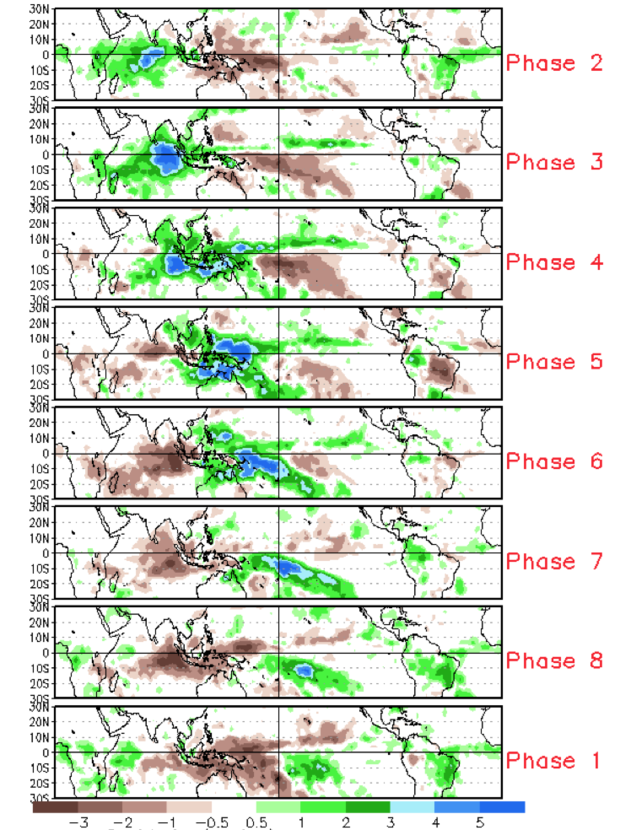
**Figure 1**  Composites indicating the typical location of active (green/blue) and suppressed (brown) convection during each phase of the MJO, and showing the eastward progression around the equator. Via [Climate.gov](https://www.climate.gov/news-features/blogs/enso/what-mjo-and-why-do-we-care).

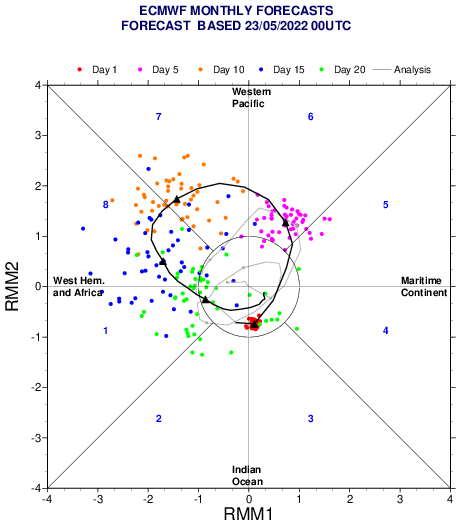
**Figure 2** Example of current MJO product from ECMWF based on forecast from 23 May 2022.

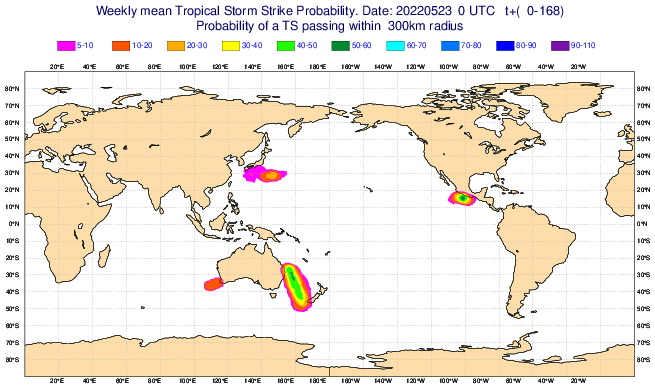
**Figure 3** Example of current tropical cyclone product from ECMWF based on forecast from 23 May 2022.

## Explore the data
We have prepared a bit of code to help you explore the MJO data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Function to read MJO data for one member

In [8]:
def read_mjo(datapath,inidate,mem):
    memS = ('{:02}'.format(mem))
    pd1 = pd.read_csv(filepath_or_buffer=datapath + "ENS_MJO_fcst_"+inidate+"_em" + memS + ".csv",skipinitialspace=True)
    pd1.index = pd.to_datetime(pd1["# YYYYMMDD"].astype("string"))
    
    return(pd1)
    

## Function to read tropical cyclone data for one member

In [9]:
def read_tc(datapath,inidate,mem):
    pd1 = pd.read_csv(filepath_or_buffer=datapath + inidate +"_"+str(mem)+".csv")
    pd1["datetime"] = pd.to_datetime(pd1["datetime"])
    return(pd1)

## Download the data

### MJO

In [11]:
#datapath = "/path/to/data/"
datapath = ''
members = list(range(1,51))
for mem in members:
    filename = f"ENS_MJO_fcst_20220523_em{mem:02}.csv"
    url = f"https://get.ecmwf.int/repository/vishackathon/mjo/{filename}"
    r = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(r.content)

### Tropical cyclone

In [6]:
for mem in members:
    filename_tc = f"20220523_{mem}.csv"
    url = f"https://get.ecmwf.int/repository/vishackathon/mjo/{filename_tc}"
    r = requests.get(url)
    with open(filename_tc, 'wb') as file:
        file.write(r.content)

## Read data

In [12]:
inidate = "20220523"

mem = 1

pd_mjo1 = read_mjo(datapath,inidate,mem)
pd_tc1 = read_tc(datapath,inidate,mem)

## Select MJO data for the forecast dates from the dataframe, and plot simple 2-d diagram

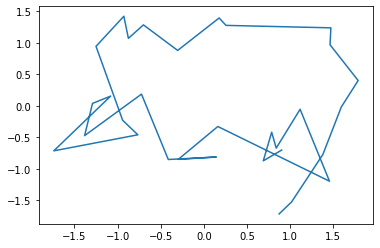

In [13]:
pd_mjo1_sel = pd_mjo1[(pd_mjo1.index >= inidate)]

plt.plot(pd_mjo1_sel.RMM1,pd_mjo1_sel.RMM2)

## Count the number of cyclones in each TC basin and date, and add to the MJO dataframe

In [14]:
basinlist=["atl","aus","cnp","enp","nin","sin","spc","wnp"]
for region in basinlist:

    pd_tc1_sel = pd_tc1[(pd_tc1["name"].str.contains(region)) & (pd_tc1["datetime"].dt.hour == 0)]

    pd_tc1_group = pd_tc1_sel.groupby(by=pd_tc1_sel["datetime"]).count()

    pd_mjo1_sel["tc_"+region] = pd_tc1_group["name"]
    pd_mjo1_sel["tc_"+region] = pd_mjo1_sel["tc_"+region].fillna(0)

<ipython-input-14-b3c00d77aef7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_mjo1_sel["tc_"+region] = pd_tc1_group["name"]
<ipython-input-14-b3c00d77aef7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_mjo1_sel["tc_"+region] = pd_mjo1_sel["tc_"+region].fillna(0)
<ipython-input-14-b3c00d77aef7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [15]:
pd_mjo1_sel

,# YYYYMMDD,RMM1,RMM2,Phase,Amplitude,RMM1_filt,RMM2_filt,Phase_filt,Amplitude_filt,tc_atl,tc_aus,tc_cnp,tc_enp,tc_nin,tc_sin,tc_spc,tc_wnp
# YYYYMMDD,,,,,,,,,,,,,,,,,
2022-05-23,20220523,0.874333,-1.714717,3,1.924763,0.079466,-0.915732,3.0,0.919173,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2022-05-24,20220524,1.019151,-1.523786,3,1.833192,0.217378,-0.706421,3.0,0.739110,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2022-05-25,20220525,1.381641,-0.771208,4,1.582306,0.568308,0.055917,5.0,0.571052,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-05-26,20220526,1.595986,-0.015644,4,1.596063,0.769501,0.813823,6.0,1.120018,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-05-27,20220527,1.791135,0.403371,5,1.835994,0.952060,1.230174,6.0,1.555553,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2022-05-28,20220528,1.464885,0.971457,5,1.757731,0.615666,1.791603,6.0,1.894435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-05-29,20220529,1.474655,1.240404,5,1.926969,0.618244,2.051088,6.0,2.142239,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-05-30,20220530,0.258087,1.279361,6,1.305134,-0.591550,2.079339,7.0,2.161847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2022-05-31,20220531,0.178256,1.396946,6,1.408273,-0.662896,2.183376,7.0,2.281789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Reproduce the MJO phase diagram

This part is the code to reproduce the [MJO phase diagram from the Open Charts](https://apps.ecmwf.int/webapps/opencharts/products/mofc_multi_mjo_family_index). It might be useful if some team has an idea for the improvement or wants to use it as a starting point.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import pandas as pd
from datetime import datetime, timedelta

In [18]:
fc_start = "20220523"
filt = True #If using RMMs with 120-day mean removed, set to True (same as operations), otherwise set to False

forecast="ENS"
fcdays=30
nens = 50

rmm_dir = ""


dates = [datetime.strptime(str(fc_start), '%Y%m%d') + timedelta(days=x) for x in range(fcdays)]
print(dates)

[datetime.datetime(2022, 5, 23, 0, 0), datetime.datetime(2022, 5, 24, 0, 0), datetime.datetime(2022, 5, 25, 0, 0), datetime.datetime(2022, 5, 26, 0, 0), datetime.datetime(2022, 5, 27, 0, 0), datetime.datetime(2022, 5, 28, 0, 0), datetime.datetime(2022, 5, 29, 0, 0), datetime.datetime(2022, 5, 30, 0, 0), datetime.datetime(2022, 5, 31, 0, 0), datetime.datetime(2022, 6, 1, 0, 0), datetime.datetime(2022, 6, 2, 0, 0), datetime.datetime(2022, 6, 3, 0, 0), datetime.datetime(2022, 6, 4, 0, 0), datetime.datetime(2022, 6, 5, 0, 0), datetime.datetime(2022, 6, 6, 0, 0), datetime.datetime(2022, 6, 7, 0, 0), datetime.datetime(2022, 6, 8, 0, 0), datetime.datetime(2022, 6, 9, 0, 0), datetime.datetime(2022, 6, 10, 0, 0), datetime.datetime(2022, 6, 11, 0, 0), datetime.datetime(2022, 6, 12, 0, 0), datetime.datetime(2022, 6, 13, 0, 0), datetime.datetime(2022, 6, 14, 0, 0), datetime.datetime(2022, 6, 15, 0, 0), datetime.datetime(2022, 6, 16, 0, 0), datetime.datetime(2022, 6, 17, 0, 0), datetime.datetime(20

In [20]:
if filt:
    RMM1_label = "RMM1_filt"
    RMM2_label = "RMM2_filt"
else:
    RMM1_label = " RMM1"
    RMM2_label = " RMM1"

Read csv files for all ensemble members into a dictionary

In [21]:
csv={}

for em in range(1,nens+1):
    csv[em] = pd.read_csv(f"{rmm_dir}{forecast}_MJO_fcst_{fc_start}_em{str(em).zfill(2)}.csv")

Create a phase diagram like the operational ones provided in Open Charts

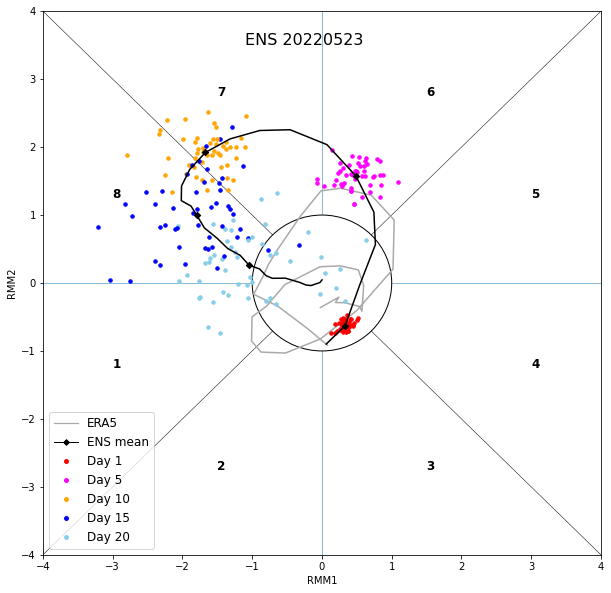

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

#axis info
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("RMM1")
plt.ylabel("RMM2")

#add horizontal, vertical and diagonal lines
ax.plot([0,1],[1,0], transform=ax.transAxes, color='k', linewidth=0.5, zorder=0)
ax.plot([0,1],[0,1], transform=ax.transAxes, color='k', linewidth=0.5, zorder=0)
plt.hlines(y=0, xmin=-4, xmax=4, linewidth=0.5, zorder=0)
plt.vlines(x=0, ymin=-4,ymax=4, linewidth=0.5, zorder=0)

#plot the centre circle at amp=1
circle = plt.Circle((0,0), 1, edgecolor='k', facecolor='w')
ax.add_artist(circle)

#add phase labels
x = [-3, -1.5, 1.5, 3, 3, 1.5, -1.5, -3]
y = [-1.25, -2.75, -2.75, -1.25, 1.25, 2.75, 2.75, 1.25]
labels=['1','2','3','4','5','6','7','8']
for l, li in zip(labels, range(8)):
    plt.text(x[li], y[li], l,fontsize=12,fontweight='bold')
    
plt.text(-1.1,3.5,forecast+" "+fc_start,fontsize=16)
if not filt:
    plt.text(-1.35,3.2,'(120-day mean not removed)', fontsize=14)
    
concat_rmm1 = np.zeros((50,31))
concat_rmm2 = np.zeros((50,31))

#get the RMM data from the dictionary; last 31 values gets the forecast 
for em in range(1,51):
    concat_rmm1[em-1,:] = csv[em][RMM1_label].tail(31).values
    concat_rmm2[em-1,:] = csv[em][RMM2_label].tail(31).values
        
#compute the ensemble mean
ensmean_rmm1 = np.zeros(30)
ensmean_rmm2 = np.zeros(30)
for lt in range(30):
    ensmean_rmm1[lt] = np.mean(concat_rmm1[:,lt])
    ensmean_rmm2[lt] = np.mean(concat_rmm2[:,lt])

#print(csv[1]['# YYYYMMDD'].values[120:150])
#plot the analysis for the 30 days before the forecast
plt.plot(csv[1][RMM1_label].values[120:151], csv[1][RMM2_label].values[120:151], color='darkgrey',linewidth=1.5)

#plot the dots for the ensemble members at 1,5,10,15 and 20 days lead times
#optionally plot the ensemble members themselves in grey
for em in range(1,51):
    #plt.plot(csv[em]['RMM1_filt'].tail(31).values, csv[em]['RMM2_filt'].tail(31).values, color='silver',linewidth=0.75)
    for lt, c in zip([1,5,10,15,20],['red','magenta','orange','blue','skyblue']):
        plt.scatter(csv[em][RMM1_label].tail(31).values[lt],csv[em][RMM2_label].tail(31).values[lt], color=c,zorder=10,s=12)

#plot the ensemble mean
plt.plot(ensmean_rmm1, ensmean_rmm2, color='k',linewidth=1.5,zorder=10)
for lt in zip([1,5,10,15,20]):
    plt.scatter(ensmean_rmm1[lt],ensmean_rmm2[lt], marker='D', color='k',zorder=10,s=20)

#set up the legend 
ensmean = plt.Line2D((0,1),(0,0),color="k",markerfacecolor='k',marker='D',linewidth=1,linestyle='-',markersize=4)
ERA5 = plt.Line2D((0,1),(0,0),color="darkgrey",linewidth=1.2,linestyle='-')
hres = plt.Line2D((0,1),(0,0),color="red",linewidth=1.2,linestyle='-')
day1 = plt.Line2D((0,1),(0,0),color="white",markerfacecolor='red',marker='o')
day5 = plt.Line2D((0,1),(0,0),color="white",markerfacecolor='magenta',marker='o')
day10 = plt.Line2D((0,1),(0,0),color="white",markerfacecolor='orange',marker='o')
day15 = plt.Line2D((0,1),(0,0),color="white",markerfacecolor='blue',marker='o')
day20 = plt.Line2D((0,1),(0,0),color="white",markerfacecolor='skyblue',marker='o')

legend = ax.legend((ERA5,ensmean,day1,day5,day10,day15,day20),['ERA5','ENS mean','Day 1', 'Day 5','Day 10','Day 15','Day 20'],loc="lower left",fontsize=12)